In [1]:
!wget http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2023-07-22 18:57:34--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.02s   

2023-07-22 18:57:34 (115 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [2]:
!unzip spa-eng.zip

Archive:  spa-eng.zip
   creating: spa-eng/
  inflating: spa-eng/_about.txt      
  inflating: spa-eng/spa.txt         


In [3]:
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
ls spa-eng

_about.txt  spa.txt


In [5]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [6]:
#Compile eng-spa translations
eng2spa={}

for line in open('spa-eng/spa.txt'):
  line=line.rstrip()
  eng,spa=line.split("\t")
  if eng not in eng2spa:
    eng2spa[eng]=[]

  eng2spa[eng].append(spa)

In [7]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [8]:
pip install nltk

In [9]:
from nltk.translate.bleu_score import sentence_bleu , SmoothingFunction

In [10]:
from nltk.tokenize import RegexpTokenizer #Tokenizer that removes punctuation
tokenizer=RegexpTokenizer(r'\w+')

In [11]:
tokenizer.tokenize("¡¿Qué me cuentas?!".lower())

['qué', 'me', 'cuentas']

In [12]:
tokens=tokenizer.tokenize("¡¿Qué me cuentas?!".lower())
sentence_bleu([tokens],tokens)# first arg is list of acceptable translations,2nd is model output

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.2213386697554703e-77

In [13]:
sentence_bleu([['hi']],['hi'])

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [14]:
smoother=SmoothingFunction()
sentence_bleu(['hi'],'hi',smoothing_function=smoother.method4)

0.2213885886251307

In [15]:
sentence_bleu(['hi there'.split()],'hi there'.split())

1.491668146240062e-154

In [16]:
sentence_bleu([[1,2,3,4]],[1,2,3,4])

1.0

In [17]:
eng2spa_tokens={}

for eng,spa_list in eng2spa.items():
  spa_list_tokens=[]
  for text in spa_list:
    tokens=tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng]=spa_list_tokens

In [18]:
!pip install transformers sentencepiece transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.7 MB/s eta 0:00:00


In [19]:
from transformers import pipeline
translator=pipeline('translation',
                    model='Helsinki-NLP/opus-mt-en-es',device=0
                    )

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [20]:
translator("I like eggs and ham")

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [22]:
eng_phrases=list(eng2spa.keys())
len(eng_phrases)

102904

In [23]:
eng_phrases_subset=eng_phrases[20_000:21_000]

In [26]:
translations=translator(eng_phrases_subset)

In [27]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [31]:
scores=[]

for eng,pred in zip(eng_phrases_subset,translations):
  mathces=eng2spa_tokens[eng]

  #Tokenize translation
  spa_pred=tokenizer.tokenize(pred['translation_text'].lower())
  score=sentence_bleu(mathces,spa_pred)
  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

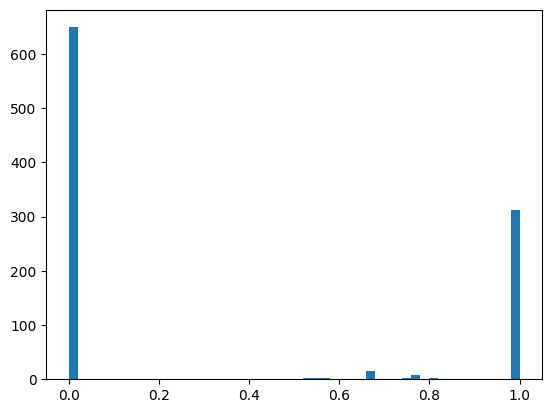

In [32]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=50);

In [33]:
import numpy as np
np.mean(scores)

0.3383504014386889

In [35]:
np.random.seed(1)


def print_random_translation():
  i=np.random.choice(len(eng_phrases_subset))
  eng=eng_phrases_subset[i]
  print("EN:",eng)

  translation=translation[i]['translation_text']
  print("ES Translation:",translation)
  mathces=eng2spa[eng]
  print("Matches:",matches)

In [ ]:
full_translations=translator(eng_phrases)

In [ ]:
scores=[]

for eng,pred in zip(eng_phrases,translations):
  mathces=eng2spa_tokens[eng]

  #Tokenize translation
  spa_pred=tokenizer.tokenize(pred['translation_text'].lower())
  score=sentence_bleu(mathces,spa_pred)
  scores.append(score)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=50);

In [ ]:
np.mean(scores)